## Preparing the data

To have access to the data in your Google Drive, you will need to run the following code to 'mount' your Drive so it is accessible to the notebook you are running on Google Colab. When you run the code, following the instructions so that your notebook can access the data. 

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from skimage.color import rgb2gray 
import cv2 




In [46]:
Path.cwd()

PosixPath('/content/drive/My Drive/Hand Gesture Data/archive/train')

In [47]:
import os
os.chdir('/content/drive/My Drive/Hand Gesture Data/archive/test/')
Path.cwd()

PosixPath('/content/drive/My Drive/Hand Gesture Data/archive/test')

In [48]:

p = Path().cwd()
q = p / "test/" # use p to create a path to the data 

target_dict = {"0":0, "1":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "11":11, "12":12, "13":13, "14":14, "15":15, "16":16, "17":17, "18":18, "19":19} # create dictionary mapping you data classes/labels to integer labels 
test_images = [] # create an empty list
test_labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label   
    for img in fldr.iterdir():
        img = plt.imread(img) # load image  
        img_array = np.array(img) # convert the image to a NumPy array 
        img_array_resized = cv2.resize(img, dsize=(128,128))
        img_array_reshaped = img_array_resized.reshape(128,128) # reshape the image from (height, width) to (height, width * 28 
        test_images.append(img_array_reshaped) # add reshaped image to list of images 
        test_labels.append(target_dict[current_label]) # add label for this image to the list of labels 

test_images = np.array(test_images) # convert the list of images to a NumPy array 
test_labels = np.array(test_labels) # convert the list of labels to a NumPy array

In [49]:
test_images.shape


(4980, 128, 128)

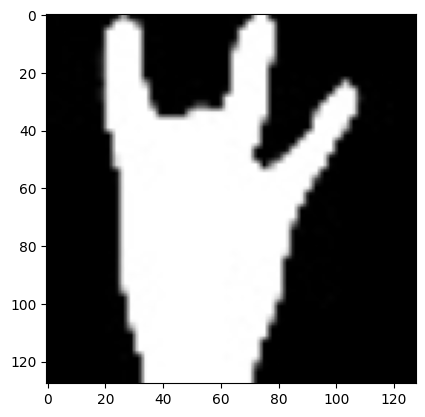

In [50]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(test_images[5], cmap='gray')

In [51]:
len(test_labels)

4980

In [52]:
test_labels.dtype


dtype('int64')

In [53]:
import os
os.chdir('/content/drive/My Drive/Hand Gesture Data/archive/train/')
Path.cwd()

PosixPath('/content/drive/My Drive/Hand Gesture Data/archive/train')

In [54]:
p = Path().cwd()
q = p / "train/" # use p to create a path to the data 

target_dict = {"0":0, "1":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "11":11, "12":12, "13":13, "14":14, "15":15, "16":16, "17":17, "18":18, "19":19} # create dictionary mapping you data classes/labels to integer labels 
train_images = [] # create an empty list
train_labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label   
    for img in fldr.iterdir():
        img = plt.imread(img) # load image  
        img_array = np.array(img) # convert the image to a NumPy array 
        img_array_resized = cv2.resize(img, dsize=(128,128))
        img_array_reshaped = img_array_resized.reshape(128,128) # reshape the image from (height, width) to (height, width * 28 
        train_images.append(img_array_reshaped) # add reshaped image to list of images 
        train_labels.append(target_dict[current_label]) # add label for this image to the list of labels 

train_images = np.array(train_images) # convert the list of images to a NumPy array 
train_labels = np.array(train_labels) # convert the list of labels to a NumPy array

In [55]:
import random

# Shuffle the data
indices = list(range(len(train_images)))
random.shuffle(indices)
train_images = train_images[indices]
train_labels = train_labels[indices]

In [56]:
train_images.shape

(18000, 128, 128)

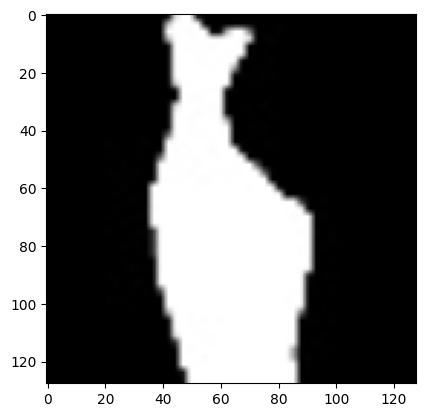

In [57]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(train_images[5], cmap='gray')

In [58]:
len(test_labels)

4980

In [59]:
test_labels.dtype

dtype('int64')

### Build, tune, and evaluate the network

In [60]:
from sklearn.model_selection import train_test_split

# Split train data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays to confirm the split
print("Training data shape: ", train_images.shape)
print("Training labels shape: ", train_labels.shape)
print("Validation data shape: ", val_images.shape)
print("Validation labels shape: ", val_labels.shape)

# Split test data into test and validation sets
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Print the shapes of the resulting arrays to confirm the split
print("Test data shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)
print("Validation data shape: ", val_images.shape)
print("Validation labels shape: ", val_labels.shape)

Training data shape:  (14400, 128, 128)
Training labels shape:  (14400,)
Validation data shape:  (3600, 128, 128)
Validation labels shape:  (3600,)
Test data shape:  (2490, 128, 128)
Test labels shape:  (2490,)
Validation data shape:  (2490, 128, 128)
Validation labels shape:  (2490,)


In [61]:
# Shuffle the data
indices = list(range(len(test_images)))
random.shuffle(indices)
test_images = test_images[indices]
test_labels = test_labels[indices]

In [62]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)
val_labels = to_categorical(val_labels)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Dropout

network = Sequential()
network.add(Flatten(input_shape=(128, 128,)))
network.add(Dense(1024, activation='sigmoid'))
network.add(Dense(20, activation='softmax'))

In [64]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_5 (Dense)             (None, 20)                20500     
                                                                 
Total params: 16,798,740
Trainable params: 16,798,740
Non-trainable params: 0
_________________________________________________________________


In [65]:
network.compile( optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [67]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=24, verbose=1, validation_data = (val_images,val_labels))

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.3681 - accuracy: 0.9706 - val_loss: 0.4472 - val_accuracy: 0.9715
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4649 - accuracy: 0.9185 - val_loss: 0.4438 - val_accuracy: 0.9325
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.4079 - accuracy: 0.9051 - val_loss: 0.4711 - val_accuracy: 0.9161
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3613 - accuracy: 0.9060 - val_loss: 0.3629 - val_accuracy: 0.9169
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3335 - accuracy: 0.8965 - val_loss: 0.3696 - val_accuracy: 0.8631
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2861 - accuracy: 0.8978 - val_loss: 0.2644 - val_accuracy: 0.9305
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.2668 - accuracy: 0.8967 - val_loss: 0.2367 - val_accuracy: 0.9305
Epoch 

In [72]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

78/78 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.8635


In [68]:
test_loss_val, test_acc_val = network.evaluate(val_images, val_labels)

78/78 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.8647


In [73]:
print('test_acc:', test_acc)

test_acc: 0.8634538054466248


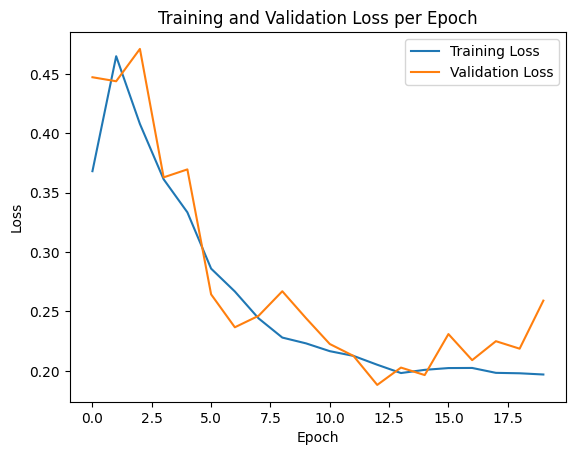

In [74]:
# Plot the training and validation loss per epoch

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

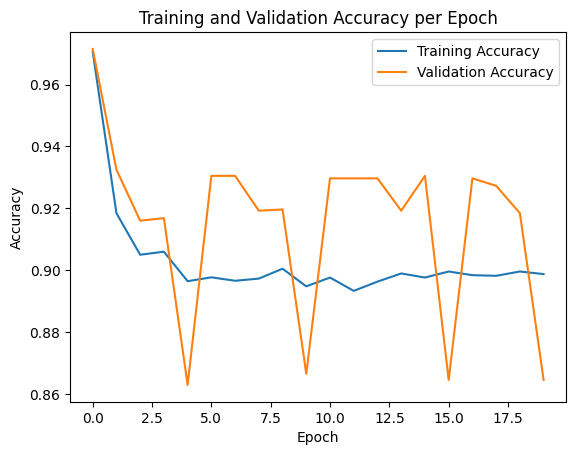

In [75]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation, SpatialDropout2D, Conv2D, MaxPooling2D
import keras
from keras.optimizers import Adam

In [97]:
import tensorflow as tf
from tensorflow.keras import layers, models

# code for loading and preprocessing data goes here

# add channel dimension to input images
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [99]:
# Load the pre-trained VGG16 model
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers in VGG16
for layer in vgg16.layers:
    layer.trainable = False

# Add a new classifier on top of the VGG16
# Define the VGG16 model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 254016)            0         
                                                                 
 dense_14 (Dense)            (None, 128)               32514176  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 20)                2580      
                                                      

In [101]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    batch_size=1024, 
                    validation_data=(val_images, val_labels),
                    verbose=1)

Epoch 1/20
15/15 [==============================] - 12s 417ms/step - loss: 314.7561 - accuracy: 0.1797 - val_loss: 2.4627 - val_accuracy: 0.2494
Epoch 2/20
15/15 [==============================] - 5s 309ms/step - loss: 2.8452 - accuracy: 0.1599 - val_loss: 2.3477 - val_accuracy: 0.2912
Epoch 3/20
15/15 [==============================] - 5s 314ms/step - loss: 6.0450 - accuracy: 0.1634 - val_loss: 2.3268 - val_accuracy: 0.2932
Epoch 4/20
15/15 [==============================] - 5s 310ms/step - loss: 2.5720 - accuracy: 0.1756 - val_loss: 2.3298 - val_accuracy: 0.2293
Epoch 5/20
15/15 [==============================] - 5s 317ms/step - loss: 2.5856 - accuracy: 0.1714 - val_loss: 2.3235 - val_accuracy: 0.2293
Epoch 6/20
15/15 [==============================] - 5s 320ms/step - loss: 2.5801 - accuracy: 0.1722 - val_loss: 2.3186 - val_accuracy: 0.2297
Epoch 7/20
15/15 [==============================] - 5s 310ms/step - loss: 2.5767 - accuracy: 0.1689 - val_loss: 2.3138 - val_accuracy: 0.2948
Epo

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()